In [1]:
from neutrino_scanner import NeutrinoScanner

In [2]:
import logging
logger = logging.getLogger("quiet_logger")
logger.setLevel(logging.ERROR)

NeutrinoScanner can be initialised with optional arguments nu_name. By default, it loads the most recent IceCube GCN circular. If a name is specified, it searches for matching GCN circulars. You can also initialise it with manual_args=(name, ra, dec, nu_time), where ra/dec are each lists in the form of [best fit, +delta_p, -delta_m]. The nu_time must be an astropy.time object. An example is found at the bottom of the script.

In [4]:
nu = NeutrinoScanner("IC190619A", logger=logger)

Checking for GCN on https://gcn.gsfc.nasa.gov/gcn3_archive.html
No GCN found for IC190619A on GCN page, checking archive instead. The latest page is 142
Checking for GCN on https://gcn.gsfc.nasa.gov/gcn3_arch_old142.html
Found match to IC190619A:  IceCube-190619A
Match is  IceCube-190619A (GCN #24854)


  3%|▎         | 5653/196608 [00:00<00:03, 56526.01it/s]

Found GCN: https://gcn.gsfc.nasa.gov/gcn3/24854.gcn3
RA: 343.26 (+ 4.08 - 2.63 deg  90% PSF containment) J2000
Neutrino time: 2019-06-19T13:14:18.040
Coordinates: RA = 343.26 (340.63 - 347.34)
Coordinates: Dec = 10.73 (8.120000000000001 - 12.24)
Finding search pixels:


 43%|████▎     | 4679/10784 [00:00<00:00, 46786.36it/s]

Projected Area: 27.16183603654153


100%|██████████| 10784/10784 [00:00<00:00, 37091.44it/s]


In [5]:
# nu.scan_cones()

  0%|          | 0/4 [00:00<?, ?it/s]

Using 4 Nightly Summaries between 20190619 and 20190622


100%|██████████| 4/4 [00:03<00:00,  1.32it/s]


Of these, 0 nights are missing because ZTF did not observe.


  0%|          | 2/1204 [00:00<01:29, 13.48it/s]

Unpacking observations


100%|██████████| 7849/7849 [00:00<00:00, 580076.68it/s]


Observations started at 2458654.9188159723
6580 pixels were covered, covering approximately 21.572469474568273 sq deg.
6580 pixels were covered at least twice, covering approximately 21.572469474568273 sq deg.


(<Figure size 432x288 with 1 Axes>,
 'In total, 83.83 % of the contour was observed at least once. \n In total, 83.83 % of the contour was observed at least twice. \nThis estimate accounts for chip gaps.')

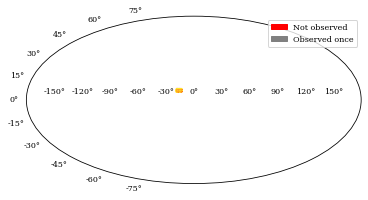

In [6]:
nu.plot_overlap_with_observations(first_det_window_days=3)

In [ ]:
# print(nu.draft_gcn())

In [ ]:
# nu.plot_overlap_with_observations()

In [ ]:
nu.simple_plot_overlap_with_observations()

# Alternative Examples

An example using an IC alert name is given below:

In [ ]:
# nu = NeutrinoScanner("190503A", logger=logger)
# nu.scan_cones()

An example using a manual specification of name/ra/dec/time is shown below:

In [ ]:
from neutrino_scanner import NeutrinoScanner
from astropy.time import Time
nu = NeutrinoScanner(manual_args=(
    "LAT-ANTARES", 
    [142.5603, +0.9, -0.9],
    [-18.0672, +0.9, -0.9],
    Time("2020-01-08T09:30:14.48", format='isot', scale='utc')
), logger=logger)
nu.scan_cones()
nu.plot_overlap_with_observations()

In [ ]:
from ztfquery import fields as ztfquery_fields

fs = [542, 543, 544]
for f in fs:
    ra, dec = ztfquery_fields.field_to_coords(f)[0]
    print(f, ra, dec, ra-3.5, ra+3.5)